In [ ]:
#-*- coding: utf-8 -*- 

In [1]:
# bibliothèques 
from sklearn.neighbors import DistanceMetric
import statistics
#from scipy.spatial import distance
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from nltk import word_tokenize
import seaborn as sns
import pandas as pd
from time import perf_counter as pf 
import nltk
from nltk import StanfordTagger
from nltk.tag import StanfordPOSTagger
from textblob import TextBlob
import numpy as np
import glob, re, os
import spacy
import string
import json
from nltk import pos_tag, word_tokenize, RegexpParser


In [2]:
def lire_fichier(chemin):
    fichier = open(chemin, encoding='utf-8') 
    chaine = fichier.read()
    fichier.close()
    return chaine

def lire_fichier_lignes(chemin):
    with open(chemin, encoding='utf-8') as f:
        lignes = f.readlines()


def etiquetter_texte(t):
    jar = 'stanford-tagger-4.2.0/stanford-postagger-full-2020-11-17/stanford-postagger.jar'
    modele = 'stanford-tagger-4.2.0/stanford-postagger-full-2020-11-17/models/french-ud.tagger' 
    blob = TextBlob(t) 
    etiquetter = StanfordPOSTagger(modele, jar, encoding='utf-8')
    texte_etiquette = pos_tagger.tag(blob.split())
    print(texte_etiquette) 

In [ ]:
# tous les articles de TALN
print("conférences TALN")
print("__"*50)
cpt1 = 1
for root1, dirs1 ,files1 in os.walk("../data/taln-archives-master/TALN/"):
    for file1 in files1:
        if file1.endswith(".txt"):
            liste_fichiers_taln = glob.glob(os.path.join(root1, file1))
            for chemin_taln in liste_fichiers_taln:
                docs1_taln = lire_fichier(chemin_taln)
                print(chemin_taln)
                print("taille du document", cpt1 ,":",len(docs1_taln), "caractères")
                nb_mots = len(docs1_taln.split())
                print(nb_mots, "mots environs")
                cpt1 += 1

In [ ]:
# tous les articles RECITAL
print("conférences RECITAL")
print("__"*50)
cpt2 = 1
for root2, dirs2 ,files2 in os.walk("../data/taln-archives-master/RECITAL/"):
    for file2 in files2:
        if file2.endswith(".txt"):
            liste_fichiers_RECITAL = glob.glob(os.path.join(root2, file2))
            for chemin_recital in liste_fichiers_RECITAL:
                docs2_recital = lire_fichier(chemin_recital)
                print(chemin_recital)
                print("taille du document", cpt2 ,":",len(docs2_recital), "caractères")
                nb_mots = len(docs2_recital.split())
                print(nb_mots, "mots environs")
                cpt1 += 1

In [3]:
with open("../data/taln-archives-master/RECITAL/RECITAL-2008/actes/recital-2008-long-001.txt") as f:
    lignes = f.readlines()
print(type(lignes))
#print(lignes)

<class 'list'>


In [9]:
tampon = ""
seuil_paragraphe = 2000
liste_paragraphes = []

for cpt, par in enumerate(lignes):
    if len(par)<10:
        continue
    if len(tampon)>seuil_paragraphe:
        liste_paragraphes.append(tampon)
        tampon = ""
        if len(par)>seuil_paragraphe:
            liste_paragraphes.append(par)
        else:
            tampon+=par
        
    elif len(par)>seuil_paragraphe:
        liste_paragraphes.append(par)
    else:
        tampon +=par
#for p in liste_paragraphes:
    #print(p)
    #print("_____"*20)

In [6]:
# à développer, séparer selon les titres 
#tampon = ""
#seuil_paragraphe = 2000
#liste_paragraphes = []
#for cpt, par in enumerate(lignes):
    #motif = re.search("^\d\s+\w.{1,}|\d\\.\d\s+\w.{1,}|^\d\\.\d\\.d\s+\w.{1,}|^\d\\.\d\\.d\\.\s+\w.{1,}", par)  
    #if motif:
        #par = par
        #print(par)

1 Introduction

2 Ritel, un système de questions-réponses oral et interactif

3 Réordonnancement des réponses candidates

4 Évaluation du système

4.1 Cadre expérimental

4.2 Analyse de l’évaluation

5 Étude du corpus de questions et des résultats obtenus

5.1 Corpus étudié

5.2 Méthodologie

5.3 Résultats de l’analyse

5.3.1 Problèmes liés aux sous-nœuds

5.3.2 Perte d’information liée à l’extraction de la phrase

5.3.3 Ajout de relations entre les nœuds

6 Conclusions et perspectives



In [10]:
print(type(liste_paragraphes))
print("nombre de paragraphes : ",len(liste_paragraphes))

<class 'list'>
nombre de paragraphes :  16


In [11]:
# caratérsitiques de chaque paragraphe qui seront peut-être utiles 
X_stylo = []
for paragraphe, texte in enumerate(liste_paragraphes): 
    
    paragraphe = paragraphe
    liste_mots1 = texte.split()
    phrases1 = texte.split(". ")
    NB_phrases1 = len(phrases1)
    NB_mots1 = len(liste_mots1)
    NB_caracteres1 = len(texte)
    moyenne_taille_mots1 = statistics.mean([len(x) for x in liste_mots1])
    moyenne_taille_phrases1 = NB_mots1/NB_phrases1
    caracteristiques1 = [NB_phrases1, NB_mots1, NB_caracteres1, moyenne_taille_mots1, moyenne_taille_phrases1]
    
    if paragraphe < len(liste_paragraphes)-1:
        paragraphe2 = liste_paragraphes[paragraphe+1]
        liste_mots2 = texte.split()
        phrases2 = texte.split(". ")
        NB_phrases2 = len(phrases2)
        NB_mots2 = len(liste_mots2)
        NB_caracteres2 = len(texte)
        moyenne_taille_mots2 = statistics.mean([len(x) for x in liste_mots2])
        moyenne_taille_phrases2 = NB_mots2/NB_phrases1
        caracteristiques2 = [NB_phrases2, NB_mots2, NB_caracteres2, moyenne_taille_mots2, moyenne_taille_phrases2]
        
caracteristiques = [caracteristiques1, caracteristiques2]

In [12]:
print("caractéristiques du paragraphe 1 : ", caracteristiques1)
print()
print("caractéristiques du paragraphe suivant : ", caracteristiques2)

caractéristiques du paragraphe 1 :  [39, 304, 2044, 5.723684210526316, 7.794871794871795]

caractéristiques du paragraphe suivant :  [16, 302, 2093, 5.927152317880795, 18.875]


In [13]:
print("les caractéristiques de chaque paragraphe dans une seule liste : \n", caracteristiques)

les caractéristiques de chaque paragraphe dans une seule liste : 
 [[39, 304, 2044, 5.723684210526316, 7.794871794871795], [16, 302, 2093, 5.927152317880795, 18.875]]


In [14]:
X_stylo.append(caracteristiques)
print(X_stylo)

[[[39, 304, 2044, 5.723684210526316, 7.794871794871795], [16, 302, 2093, 5.927152317880795, 18.875]]]


In [15]:
# vectoriser le document 
V = TfidfVectorizer(encoding='utf-8', analyzer='word')
#X = V.fit_transform(liste_paragraphes).todense()
X = V.fit_transform(liste_paragraphes).toarray()
print(type(X))
#for distance in ["braycurtis"]:
    #distance = DistanceMetric.get_metric(distance)
print(X.shape)


from scipy.spatial import distance
for cpt, vecteur in enumerate(X):
    vecteur = vecteur #!
    if cpt < len(liste_paragraphes)-1:
        vecteur2 = X[cpt+1]
        #print(distance)
        #similarite = cpt, distance.pairwise(vecteur, vecteur2)
        similarite_cosine = ("paragraphe ",cpt, distance.cosine(vecteur, vecteur2))
        #print(similarite)
        print(similarite_cosine)

<class 'numpy.ndarray'>
(16, 1184)
('paragraphe ', 0, 0.6118087721076215)
('paragraphe ', 1, 0.5216953076589974)
('paragraphe ', 2, 0.4731329958614173)
('paragraphe ', 3, 0.5545425814364113)
('paragraphe ', 4, 0.44761322730386754)
('paragraphe ', 5, 0.4863907500012139)
('paragraphe ', 6, 0.6109576435382881)
('paragraphe ', 7, 0.5912560149765507)
('paragraphe ', 8, 0.5514411587448387)
('paragraphe ', 9, 0.7227734015663633)
('paragraphe ', 10, 0.6504420750360135)
('paragraphe ', 11, 0.4734697978145014)
('paragraphe ', 12, 0.5632143539169405)
('paragraphe ', 13, 0.692017467230908)
('paragraphe ', 14, 0.8346390112475064)


In [16]:
#print(liste_paragraphes[0])
#print("__"*20)
#print(liste_paragraphes[-1])

Text(0.5, 1.0, 'Clusters des paragraphes')

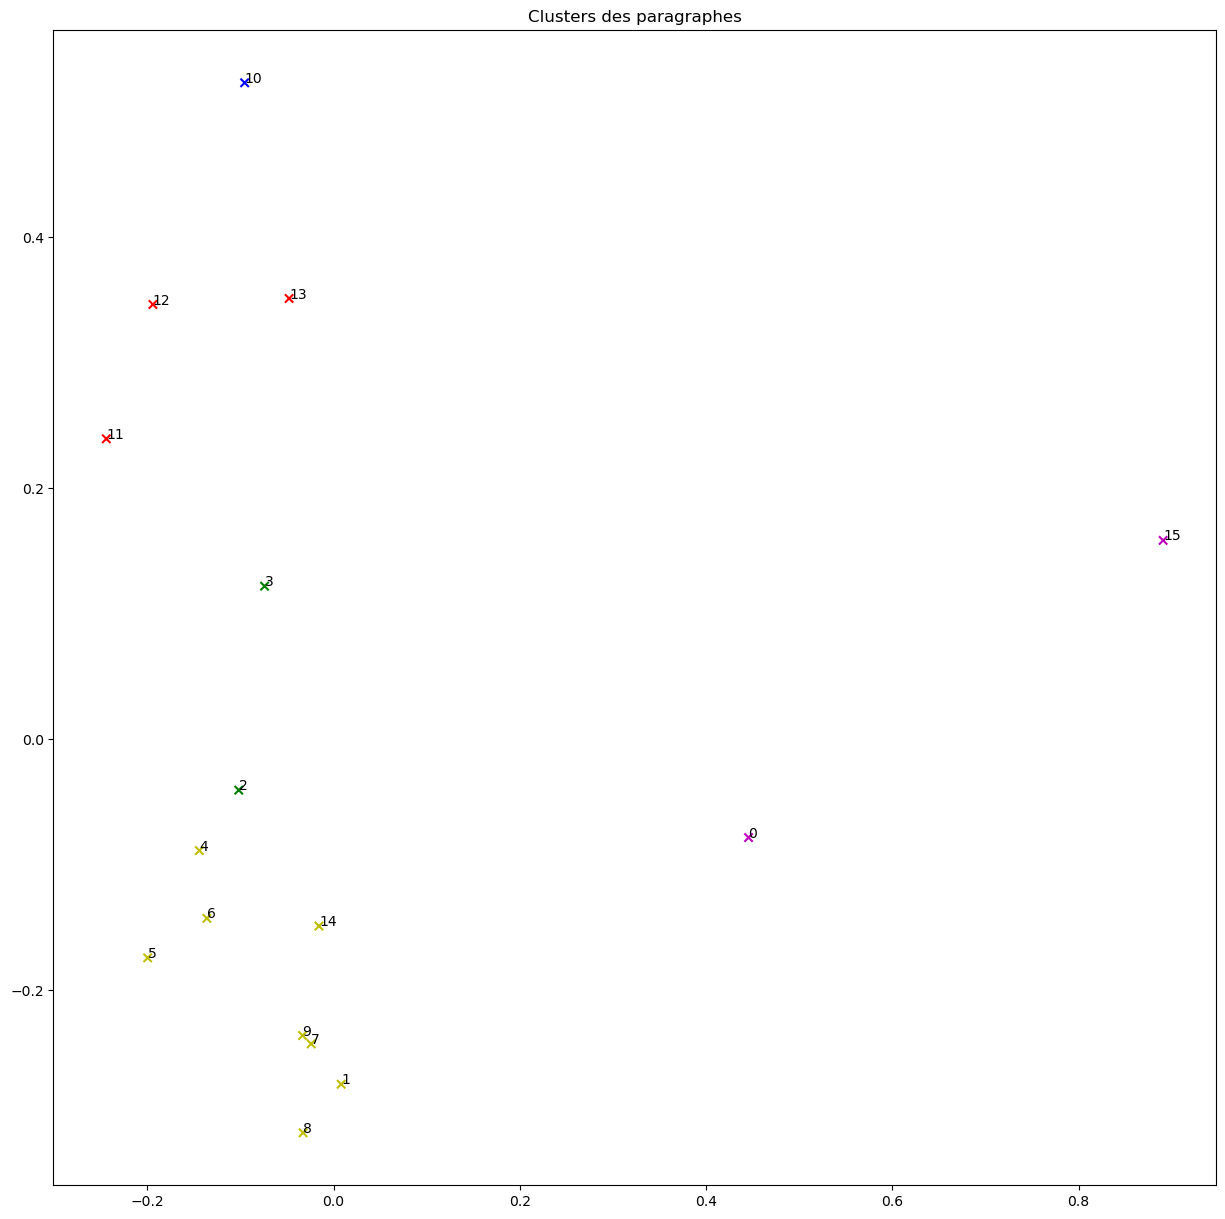

In [17]:
# cluster pour les tokens 

vecteurs = X
km = KMeans(n_clusters=5,init = 'k-means++', random_state = 0, max_iter=300)
predire_clusters = km.fit_predict(vecteurs)

pca = PCA(n_components=3)
nuage_points = pca.fit_transform(vecteurs)

colors = ["b", "y", "r", "g", "m" ]

abscisses_x = [o[0] for o in nuage_points]
ordonnees_y = [o[1] for o in nuage_points]
fig, ax = plt.subplots(figsize=(15,15))

scatter = ax.scatter(abscisses_x, ordonnees_y, c=[colors[d] for d in predire_clusters], marker='x')
centroides = km.cluster_centers_


for i, txt in enumerate(vecteurs):
    ax.annotate(i, (abscisses_x[i], ordonnees_y[i]))

ax.set_facecolor("white")
plt.title("Clusters des paragraphes")


In [18]:
modele = spacy.load('fr_core_news_md')

In [19]:
# étiquetter le document 
texte_etiquettes = []
for par in liste_paragraphes:
    liste_tokens = modele(par)
    liste_etiquettes = [token.pos_ for token in liste_tokens]
    texte_etiquettes.append(" ".join(liste_etiquettes))
print(type(liste_etiquettes))
print("nombre étiquettes paragraphes 1 : ", len(texte_etiquettes[0]))
print("nombre étiquettes paragraphes 2 : ", len(texte_etiquettes[1]))
print()
print("nombre de paragraphes étiquettés : ", len(texte_etiquettes))
print()
print("paragraphe étiquetté 1 : ", texte_etiquettes[0])

<class 'list'>
nombre étiquettes paragraphes 1 :  1773
nombre étiquettes paragraphes 2 :  2087

nombre de paragraphes étiquettés :  16

paragraphe étiquetté 1 :  NOUN NUM PUNCT PROPN PUNCT PROPN NOUN NUM SPACE NOUN ADP NOUN ADP NOUN ADP SPACE NOUN ADP NOUN PUNCT NOUN CCONJ NOUN ADP SPACE NOUN SPACE PROPN PROPN SPACE PUNCT NUM PUNCT NOUN PUNCT PROPN PUNCT NOUN NUM PUNCT NUM NOUN PUNCT PROPN SPACE PROPN SPACE NOUN PUNCT ADP DET NOUN PRON VERB DET NOUN CCONJ DET NOUN ADP NOUN ADP DET SPACE NOUN ADP NOUN ADP NOUN ADP DET NOUN ADP NOUN PRON NOUN PUNCT DET NOUN VERB DET NOUN ADP NOUN ADJ ADP DET NOUN ADP VERB DET NOUN ADP SPACE NOUN ADP NOUN PUNCT PRON VERB DET NOUN ADP NOUN VERB ADP DET NOUN NOUN SPACE NOUN NOUN NOUN CCONJ DET NOUN ADP DET NOUN ADP NOUN ADJ ADP DET NOUN PUNCT SPACE NOUN PUNCT NOUN X NOUN NOUN NOUN X X X X X X X NOUN X SPACE NOUN X X X NOUN PUNCT X PROPN PUNCT NOUN X X VERB NOUN X X X X AUX X VERB ADV PUNCT X NOUN X X X X NOUN PRON X X SPACE NOUN NOUN NUM NOUN X NOUN ADJ NOU

In [20]:
#from scipy.spatial import distance
V = TfidfVectorizer(ngram_range=(1,2))
X_pos = V.fit_transform(texte_etiquettes).toarray()
#X_pos = V.fit_transform(texte_etiquettes).todense()
for cpt, vecteur in enumerate(X_pos):
    vecteur = vecteur
    if cpt<len(texte_etiquettes)-1:
        vecteur2 = X_pos[cpt+1]
        #similarite = cpt, distance.pairwise(vecteur, vecteur2) #todense
        similarite_cosine = cpt, distance.cosine(vecteur, vecteur2)
        print(similarite_cosine)
        #print(similarite)
#distances = distance.pairwise(X_pos) # todense
#ax = sns.heatmap(distances)

(0, 0.04045125758262602)
(1, 0.026125086667213138)
(2, 0.025158150531368273)
(3, 0.04001038867302564)
(4, 0.028421487009181456)
(5, 0.07598267660499791)
(6, 0.11038849384938387)
(7, 0.058107846510542904)
(8, 0.04023044344379412)
(9, 0.06699009997737337)
(10, 0.0718443844470894)
(11, 0.028324481407012714)
(12, 0.06934760691464803)
(13, 0.07501710666210037)
(14, 0.27868270997700617)


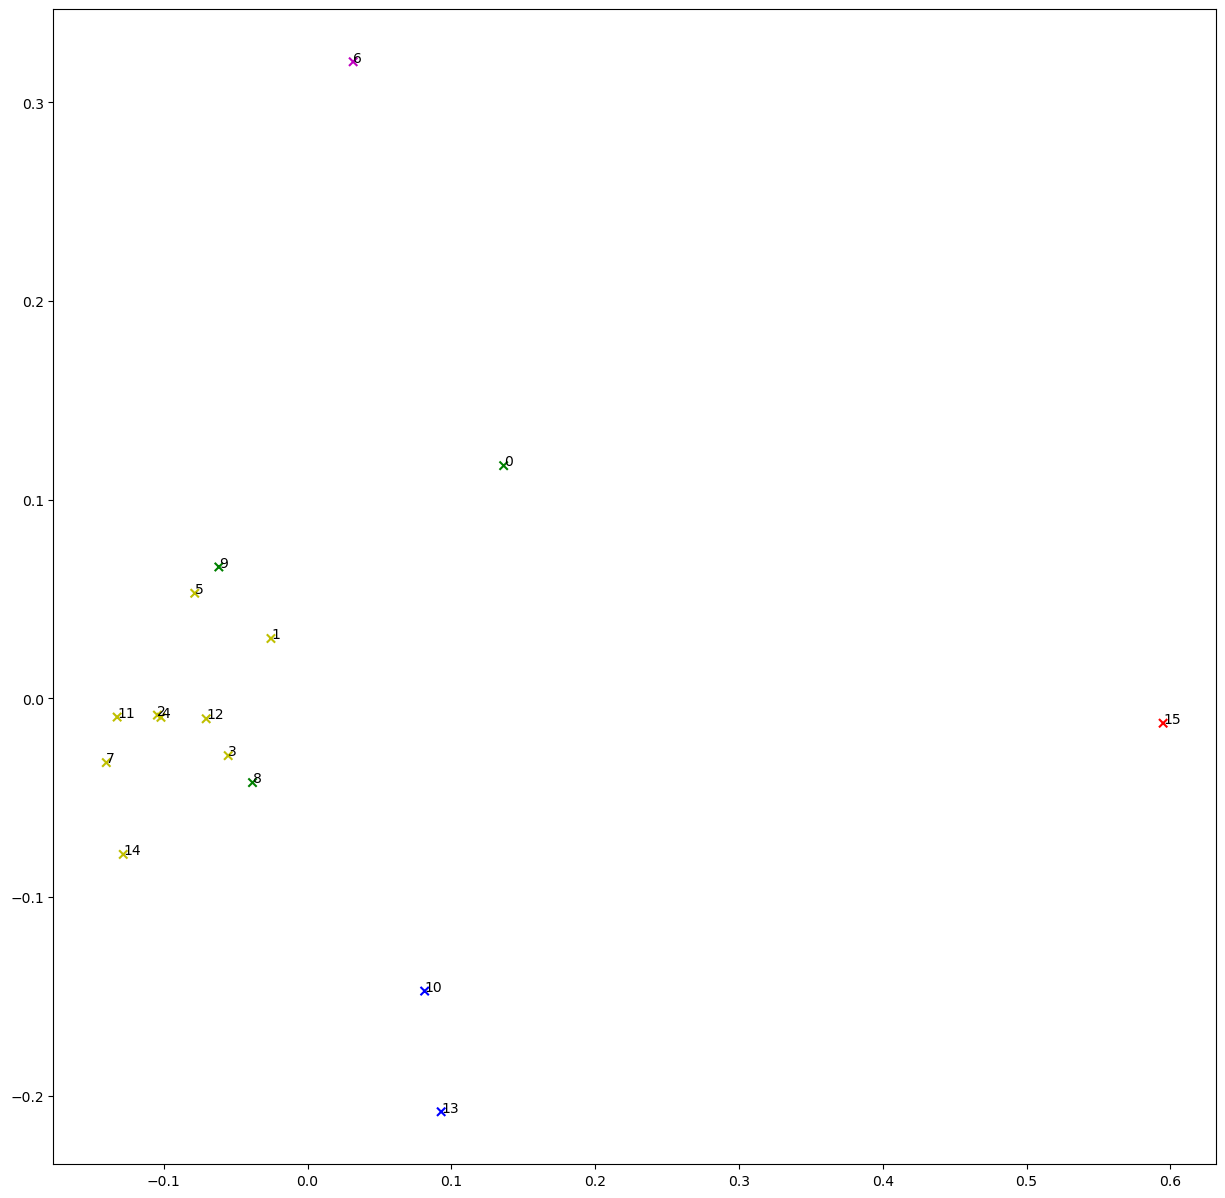

In [21]:
# clusters pour les uni-grammes d'étiquettes # essayer avec les bi-grammes, tri-grammes...
vecteurs = X_pos
km = KMeans(n_clusters=5,init = 'k-means++', random_state = 0, max_iter=500)
predire_clusters = km.fit_predict(vecteurs)

pca = PCA(n_components=3)
nuage_points = pca.fit_transform(vecteurs)

colors = ["b", "y", "r", "g", "m" ]

abscisses_x = [o[0] for o in nuage_points]
ordonnees_y = [o[1] for o in nuage_points]

fig, ax = plt.subplots(figsize=(15,15))

scatter = ax.scatter(abscisses_x, ordonnees_y,c=[colors[d] for d in predire_clusters], marker='x')


centroides = km.cluster_centers_

cen_x = [i[0] for i in centroides] 
cen_y = [i[1] for i in centroides]


for i, txt in enumerate(vecteurs):
    ax.annotate(i, (abscisses_x[i], ordonnees_y[i]))

ax.set_facecolor("white")

In [22]:
print(cen_x)
print(cen_y)

[0.12696473439183148, 0.1338717463258132, 0.10094184322095852, 0.08488357442058836, 0.06092546419316043]
[0.0, 0.004163377019827837, 0.021691380734286583, 0.004522461587087103, 0.0]


In [23]:
#print(km.labels_)

In [24]:
# calcul du taux de lexicalité avec le glaff  

with open("../data/GLAFF-1.2.2/glaff-1.2.2.txt",encoding='utf-8') as f:
    ligne = f.readline()
    cpt = 0 
    dic_glaff = {}
    while len(ligne) > 0:
        cpt += 1
        elements = re.split("\|", re.sub("\n", "", ligne))
        frequence = 0 
        forme = elements[0]
        for index in range(6, len(elements)+1, 2):
            frequence += float(elements[index])
        dic_glaff[forme] = frequence
        ligne = f.readline()
with open("freq_glaff_%i.json"%cpt, "w") as w:
    w.write(json.dumps(dic_glaff))
set_mots_glaff = set(dic_glaff.keys())
print("taille glaff : %i types"%len(set_mots_glaff))

taille glaff : 1082688 types


In [25]:
with open("freq_glaff_1406857.json", encoding='utf-8') as f:
        glaff = json.load(f)
        set_mots_GLAFF = set(glaff)

In [27]:
# lexique de chaque paragraphe 
# créer un vocabulaire des paragraphes 

vocabulaire_paragraphe = set()

for paragraphe, texte in enumerate (liste_paragraphes):
    print()
    print("paragraphe : ", paragraphe)
    paragraphe = paragraphe
    lexique = re.findall("[a-zA-ZÀ-ÿ][a-zA-ZÀ-ÿ-]*", texte)
    set_mots_lexique = set(lexique)
    
    communs = vocabulaire_paragraphe.intersection(set_mots_GLAFF)
    manquants = set_mots_lexique.difference(set_mots_GLAFF)
    
    
    print("absents dans le glaff --->",len(manquants), list(manquants)[:5])
    for x in set_mots_lexique:
        vocabulaire_paragraphe.add(x)
    #try:
        #proportion_mots_nouveaux = "Proportion mots nouveaux : %f"%(1-(len(communs)/len(set_mots_lexique))) # j'ai une erreur de division par zéro
    #except:
        #Exception
    #print(proportion_mots_nouveaux)
    #print("---"*10)
    #print("communs avec le glaff : ", communs)
    print("présents dans le glaff --->", len(communs))
    
    
    # on a besoin des fréquences de tokens pour calculer le taux de lexicalité de chaque paragraphe 
    
    dic_freq = {} # dictionnaire pour stocker nb apparitions de chaque mots
    for mot in lexique:
        if mot not in dic_freq:
            dic_freq[mot] = 1
        else:
            dic_freq[mot] += 1
    paires = [[effectif, mot] for mot, effectif in dic_freq.items()] 
    liste_tri = sorted(paires, reverse=True)[:5] 
    plus_freq = set([mot for effectif, mot in liste_tri])
    print("mots fréquents du paragraphe --->", paragraphe,"-->",liste_tri)
    
    # taux de lexicalité 
    taux_de_lexicalite = len(communs)/len(dic_freq)
    
    print("taux de lexicalité --->", taux_de_lexicalite)


paragraphe :  0
absents dans le glaff ---> 66 ['lorsqu', 'Notre', 'Language', 'Méthode', 'answers']
présents dans le glaff ---> 0
mots fréquents du paragraphe ---> 0 --> [[13, 'de'], [10, 'une'], [10, 'des'], [7, 'question'], [7, 'd']]
taux de lexicalité ---> 0.0

paragraphe :  1
absents dans le glaff ---> 28 ['Villaneau', 'Concrètement', 'Plus', 'Guillaume', 'Dans']
présents dans le glaff ---> 108
mots fréquents du paragraphe ---> 1 --> [[26, 'de'], [10, 'et'], [10, 'des'], [9, 'd'], [8, 'un']]
taux de lexicalité ---> 0.6101694915254238

paragraphe :  2
absents dans le glaff ---> 30 ['prep', 'Chacune', 'Enfin', 'aux', 'Dans']
présents dans le glaff ---> 217
mots fréquents du paragraphe ---> 2 --> [[22, 'de'], [16, 'la'], [10, 'les'], [10, 'et'], [7, 'un']]
taux de lexicalité ---> 1.3821656050955413

paragraphe :  3
absents dans le glaff ---> 31 ['Notre', 'Or', 'aux', 'Dans', 'Ainsi']
présents dans le glaff ---> 282
mots fréquents du paragraphe ---> 3 --> [[13, 'des'], [12, 'de'], [11

In [ ]:
# motifs syntaxiques 
# calcul de la fréquence des étiquettes par n-grammes  
# sortir la fréquence de chaque motif par ex SCONJ DET NOUN dans chaque paragraphe 
#lemmatisation